In [10]:
import warnings, os
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
import numpy as np
import palettable

plt.rc("figure", dpi=120)
plt.style.use('paperfigure.mplstyle')

In [1]:
from ezpadova import parsec

In [2]:
parsec_solar_gaia = parsec.get_t_isochrones(6, 9, 0.05, 0.0152, phot='gaia', model='parsec12s').to_pandas()
print(len(parsec_solar_gaia))

parsec_solar_gaia = parsec_solar_gaia.rename(columns={'log(age/yr)':'log_age'})
parsec_solar_gaia['bp_rp'] = parsec_solar_gaia['G_BP'] - parsec_solar_gaia['G_RP']

Interrogating http://stev.oapd.inaf.it...
15090


In [3]:
parsec_solar_tmass = parsec.get_t_isochrones(
    6, 9, 0.05, 0.0152,
    phot='2mass_spitzer_wise', model='parsec12s').to_pandas()
parsec_solar_tmass = parsec_solar_tmass.rename(columns={'log(age/yr)':'log_age'})

Interrogating http://stev.oapd.inaf.it...


In [4]:
parsec_solar_ps = parsec.get_t_isochrones(6, 9, 0.05, 0.0152, phot='panstarrs1', model='parsec12s').to_pandas()
parsec_solar_ps = parsec_solar_ps.rename(columns={'log(age/yr)':'log_age'})

Interrogating http://stev.oapd.inaf.it...


In [5]:
parsec_solar_galex = parsec.get_t_isochrones(6, 9, 0.05, 0.0152, phot='galex', model='parsec12s').to_pandas()
parsec_solar_galex = parsec_solar_galex.rename(columns={'log(age/yr)':'log_age'})

Interrogating http://stev.oapd.inaf.it...


In [6]:
common_columns = list(parsec_solar_gaia.columns.intersection(parsec_solar_tmass.columns))
parsec_solar = parsec_solar_gaia\
    .merge(parsec_solar_tmass, on=common_columns)\
    .merge(parsec_solar_ps, on=common_columns)\
    .merge(parsec_solar_galex, on=common_columns)

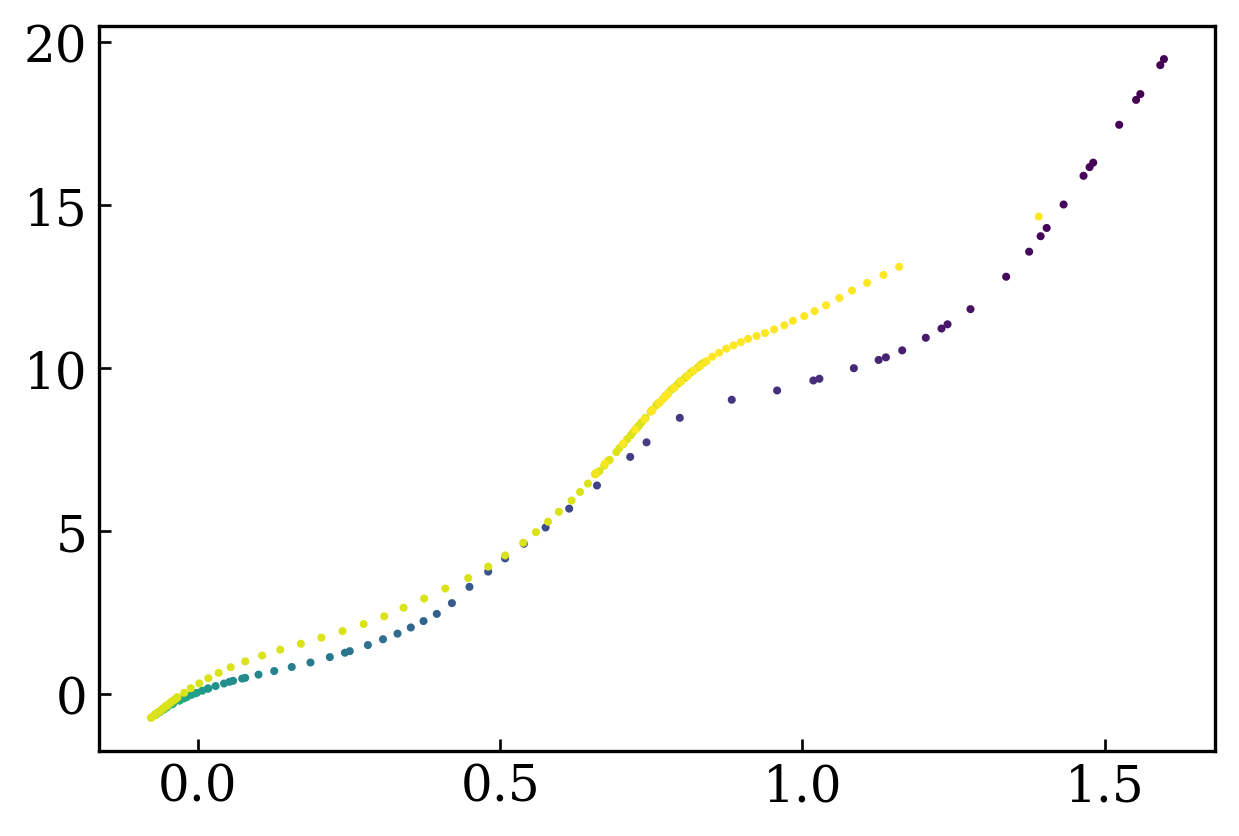

In [11]:
iso = parsec_solar.groupby('log_age').get_group(8.4)
plt.scatter(iso.G-iso.G_RP, iso.NUV-iso.G, c=iso.M_ini, s=2);

In [13]:
%store parsec_solar

Stored 'parsec_solar' (DataFrame)
